## This notebook contains:
### 01. Import libraries and data
### 02. Create subset for visualizations in Tableau
### 03. Categorical variable analysis
### 04. Description length analysis
### 05. Box and whiskers for totalRent, livingSpace, unit price

Note: The purpose of this notebook is to address lingering questions about factors that may affect rent and create visualizations for the three main characteristics I'm interested in (rent, size and rent per square meter).

# 01. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# create shortcut for data imports
path = r'C:\Users\jacym\Desktop\Career Foundry projects\german rent'

In [3]:
df = pd.read_csv(os.path.join(path, '02 data', 'cleaned data', 'rent_district_pop_merged.csv'), index_col = False)

In [4]:
df.head()

,scoutId,regio1,baseRent,totalRent,pricetrend,livingSpace,plz,picturecount,newlyConst,yearConstructed,...,date,population,populationTrend,popTrendCat,surfaceArea,populationDensity,space/person,people/apt,districtPopTrend,districtPop
0,96107057,Nordrhein_Westfalen,595.0,840.00,4.62,86.00,44269,6,False,1965.0,...,2019-05-10,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010
1,92798563,Nordrhein_Westfalen,972.6,1320.65,3.76,87.00,44229,12,True,2018.0,...,2019-05-10,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010
2,114894763,Nordrhein_Westfalen,396.8,493.80,4.10,62.00,44137,0,False,1958.0,...,2020-02-01,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010
3,90046012,Nordrhein_Westfalen,310.0,460.00,3.28,55.00,44329,14,False,1930.0,...,2019-05-10,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010
4,87928570,Nordrhein_Westfalen,301.0,NaN,4.41,30.07,44137,31,False,1979.0,...,2018-09-22,17935147,-0.02,stable,34098,526,41.41,2.12,0.33,587010


In [5]:
df.shape

(257607, 39)

In [9]:
df.at[158263,'livingSpace']=600

In [10]:
df['regio1'].value_counts()

Nordrhein_Westfalen       61678
Sachsen                   52346
Bayern                    21600
Sachsen_Anhalt            20117
Hessen                    17843
Niedersachsen             16284
Baden_Württemberg         16084
Berlin                    10405
Thüringen                  8384
Rheinland_Pfalz            8367
Brandenburg                6948
Schleswig_Holstein         6668
Hamburg                    3759
Bremen                     2963
Mecklenburg_Vorpommern     2734
Saarland                   1427
Name: regio1, dtype: int64

In [11]:
df.isna().sum()

scoutId                     0
regio1                      0
baseRent                    0
totalRent               39303
pricetrend               1708
livingSpace                70
plz                         0
picturecount                0
newlyConst                  0
yearConstructed         54395
firingTypes             54416
heatingType             42643
hasKitchen                  0
cellar                      0
condition               64656
street                      0
lift                        0
typeOfFlat              34068
noRooms                     0
floor                   49404
balcony                     0
garden                      0
baseRentRange               0
noRoomsRange                0
livingSpaceRange            0
yearConstructedRange    54395
regio2                      0
regio3                      0
description             18209
date                        0
population                  0
populationTrend             0
popTrendCat                 0
surfaceAre

In [12]:
df['typeOfFlat'].value_counts()

apartment              126548
roof_storey             33345
ground_floor            30559
other                    8968
maisonette               8948
raised_ground_floor      5380
penthouse                3546
terraced_flat            3322
half_basement            1980
loft                      943
Name: typeOfFlat, dtype: int64

In [13]:
df.dtypes

scoutId                   int64
regio1                   object
baseRent                float64
totalRent               float64
pricetrend              float64
livingSpace             float64
plz                       int64
picturecount              int64
newlyConst                 bool
yearConstructed         float64
firingTypes              object
heatingType              object
hasKitchen                 bool
cellar                     bool
condition                object
street                   object
lift                       bool
typeOfFlat               object
noRooms                 float64
floor                   float64
balcony                    bool
garden                     bool
baseRentRange             int64
noRoomsRange              int64
livingSpaceRange          int64
yearConstructedRange    float64
regio2                   object
regio3                   object
description              object
date                     object
population                int64
populati

In [15]:
df.shape

(257607, 40)

# 02. Create subset for visualizations in Tableau

In [16]:
tableau_sub = df[['totalRent', 'livingSpace', 'price/unit', 'regio1', 'hasKitchen', 'balcony', 'lift']]

In [17]:
tableau_sub.shape

(257607, 7)

In [18]:
tableau_sub.isna().sum()

totalRent      39303
livingSpace       70
price/unit     39356
regio1             0
hasKitchen         0
balcony            0
lift               0
dtype: int64

In [19]:
tableau_sub_edit = tableau_sub.dropna(inplace=False)

In [20]:
tableau_sub_edit.isna().sum()

totalRent      0
livingSpace    0
price/unit     0
regio1         0
hasKitchen     0
balcony        0
lift           0
dtype: int64

In [24]:
import statistics
statistics.median(tableau_sub_edit['price/unit'])

9.9

In [22]:
tableau_sub_edit.to_clipboard()

# 03. Categorical variable analysis

# Q: Are units with kitchens more expensive?
### A: Yes, and they're also newer, higher priced per unit, larger, have more pictures and are located in districts with higher population growth rates.

In [29]:
df.groupby(['hasKitchen']).agg({'hasKitchen' : ['count'],
                          'totalRent': ['mean', 'median'],
                          'price/unit':['mean', 'median'], 
                          'yearConstructed':['mean', 'median'],  
                          'livingSpace':['mean', 'median'],
                          'picturecount':['mean', 'median'],
                          'districtPopTrend':['mean', 'median']})



hasKitchen    totalRent        price/unit             \
                count         mean median       mean     median   
hasKitchen                                                        
False          167974   720.578092  589.0  10.031653   8.996215   
True            89633  1020.269478  850.0  13.807973  12.376199   

           yearConstructed         livingSpace        picturecount         \
                      mean  median        mean median         mean median   
hasKitchen                                                                  
False          1964.124668  1969.0   71.891383  66.24     9.122436    8.0   
True           1973.247228  1985.0   77.347626  70.91    11.157319   10.0   

           districtPopTrend         
                       mean median  
hasKitchen                          
False              0.387426   0.35  
True               0.618130   0.60

Text(0, 0.5, 'Rent')

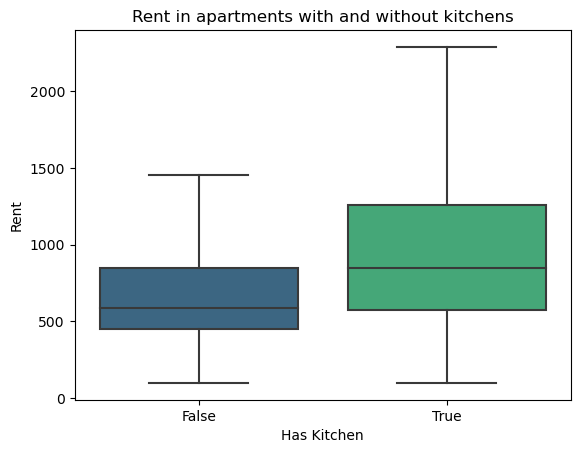

In [68]:
sns.boxplot(data=df, x='hasKitchen', y='totalRent', palette= 'viridis', sym='')
plt.title('Rent in apartments with and without kitchens')
plt.xlabel('Has Kitchen')
plt.ylabel('Rent')

# Q: Are kitchens more common in some areas than others?
### A: Yes, there are significant discrepancies. 
Hamburg 79%, Schleswig-Holstein 73%, Badem-Württemberg 62%, Berlin 59%, Hessen 57%, Bayern 53%, Bremen 46%, Niedersachsen 43%, Rheinland-Pfalz 43%, Saarland 36%, Mecklenburg-Vorpommern 33%, Brandenburg 25%, Sachsen 22%, Nordrhein-Westfalen 21%, Thüringen 16%, Sachsen Anhalt 15%

In [31]:
df.groupby(['regio1', 'hasKitchen']).agg({'hasKitchen' : ['count']})

hasKitchen
                                       count
regio1                 hasKitchen           
Baden_Württemberg      False            6033
                       True            10051
Bayern                 False           10177
                       True            11423
Berlin                 False            4244
                       True             6161
Brandenburg            False            5245
                       True             1703
Bremen                 False            1594
                       True             1369
Hamburg                False             798
                       True             2961
Hessen                 False            7672
                       True            10171
Mecklenburg_Vorpommern False            1824
                       True              910
Niedersachsen          False            9293
                       True             6991
Nordrhein_Westfalen    False           48524
                       True            13154
Rheinland_Pfalz        False            4773
                       True             3594
Saarland               False             918
                       True              509
Sachsen                False           41044
                       True            11302
Sachsen_Anhalt         False           17004
                       True             3113
Schleswig_Holstein     False            1805
                       True             4863
Thüringen              False            7026
                       True             1358

# Q: Do electricity and heating type have a correlation with rental prices?
### A: Floor heating has a higher unit price, as do (less common) heat pump, wood pellets, solar. These heating types are also associated with newer units with higher population growth

In [36]:
df.groupby(['heatingType']).agg({'heatingType': ['count'],
                          'totalRent': ['mean', 'median'],
                          'price/unit':['mean', 'median'], 
                          'yearConstructed':['mean', 'median'],  
                          'livingSpace':['mean', 'median'],
                          'picturecount':['mean', 'median'],
                          'districtPopTrend':['mean', 'median']})

heatingType    totalRent           price/unit  \
                                     count         mean    median       mean   
heatingType                                                                    
central_heating                     123169   760.255073   610.995  10.865859   
combined_heat_and_power_plant         1962  1140.124733  1089.500  13.920423   
district_heating                     23383   805.046019   600.000  11.330895   
electric_heating                       881   665.603678   590.000  10.487397   
floor_heating                        17439  1324.806314  1190.000  14.719640   
gas_heating                          19164   826.843995   700.000  10.827301   
heat_pump                             2687  1194.424636  1100.000  13.012773   
night_storage_heater                  1291   578.672705   517.770   9.023872   
oil_heating                           4919   840.051456   750.000  10.709237   
self_contained_central_heating       18621   736.334787   610.000  10.040954   
solar_heating                          163  1151.367551  1050.000  12.274499   
stove_heating                          333   614.074357   539.930  10.033415   
wood_pellet_heating                    952  1057.459207   991.000  13.192828   

                                          yearConstructed         livingSpace  \
                                   median            mean  median        mean   
heatingType                                                                     
central_heating                  9.512195     1961.982535  1970.0   71.576408   
combined_heat_and_power_plant   13.461538     1999.677066  2017.0   84.128965   
district_heating                 9.714581     1974.954007  1977.0   68.937432   
electric_heating                 8.974359     1960.408940  1971.5   67.751283   
floor_heating                   13.538385     2003.908599  2017.0   92.366154   
gas_heating                      9.776410     1960.528320  1970.0   77.372119   
heat_pump                       12.467949     2012.696350  2018.0   93.590056   
night_storage_heater             8.227848     1958.583587  1969.0   66.752023   
oil_heating                      9.875000     1965.933188  1970.0   81.478550   
self_contained_central_heating   8.875000     1943.469054  1953.0   74.807541   
solar_heating                   11.510791     1994.722973  2013.0   93.781779   
stove_heating                    9.000000     1948.742188  1954.0   65.068318   
wood_pellet_heating             12.195122     1997.409976  2016.0   84.064202   

                                       picturecount        districtPopTrend  \
                                median         mean median             mean   
heatingType                                                                   
central_heating                 65.990     9.937070    9.0         0.453213   
combined_heat_and_power_plant   82.000    10.841998   10.0         0.665566   
district_heating                62.620     9.300304    8.0         0.390591   
electric_heating                65.000     9.414302    9.0         0.449432   
floor_heating                   88.000    11.943403   11.0         0.735320   
gas_heating                     72.000     9.809330    9.0         0.446756   
heat_pump                       90.265    10.605508    9.0         0.557507   
night_storage_heater            65.000     9.247095    8.0         0.349489   
oil_heating                     77.000    10.218947    9.0         0.485965   
self_contained_central_heating  69.000     9.659417    9.0         0.391353   
solar_heating                   88.170    11.061350   10.0         0.569693   
stove_heating                   60.000     8.267267    8.0         0.423423   
wood_pellet_heating             80.470    10.401261   10.0         0.653613   

                                       
                               median  
heatingType                            
central_heating                  0.41  
combined_heat_and_power_plan

# Q: Does the presence of a balcony and/or garden have a correlation with price?
### A: Balconies are associated with higher rents, higher unit price, larger apartments, more pictures, higher population growth, newer units. Gardens don't seem to indicate much about the other characteristics.

In [37]:
df.groupby(['balcony']).agg({'balcony': ['count'],
                          'totalRent': ['mean', 'median'],
                          'price/unit':['mean', 'median'], 
                          'yearConstructed':['mean', 'median'],  
                          'livingSpace':['mean', 'median'],
                          'picturecount':['mean', 'median'],
                          'districtPopTrend':['mean', 'median']})

balcony   totalRent        price/unit            yearConstructed  \
          count        mean median       mean     median            mean   
balcony                                                                    
False     98148  640.250399  531.0  10.703207   9.000000     1950.142914   
True     159459  941.258974  780.0  11.785666  10.567216     1976.489372   

                livingSpace        picturecount        districtPopTrend         
         median        mean median         mean median             mean median  
balcony                                                                         
False    1956.0   63.706228   60.0     8.839314    8.0         0.385435   0.35  
True     1981.0   79.994766   73.0    10.440521    9.0         0.518331   0.51

Text(0, 0.5, 'Rent')

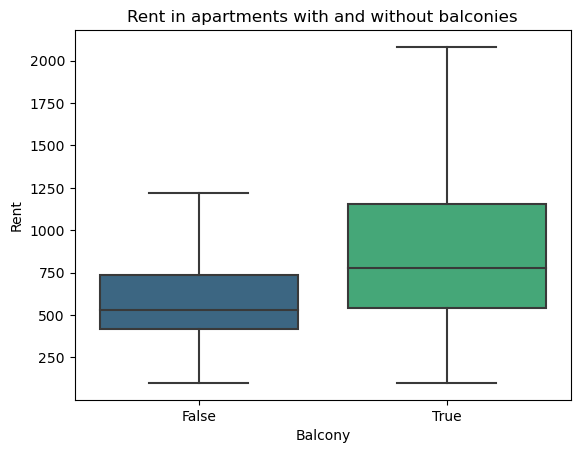

In [69]:
sns.boxplot(data=df, x='balcony', y='totalRent', palette= 'viridis',
           sym='')
plt.title('Rent in apartments with and without balconies')
plt.xlabel('Balcony')
plt.ylabel('Rent')

In [38]:
df.groupby(['garden']).agg({'garden': ['count'],
                          'totalRent': ['mean', 'median'],
                          'price/unit':['mean', 'median'], 
                          'yearConstructed':['mean', 'median'],  
                          'livingSpace':['mean', 'median'],
                          'picturecount':['mean', 'median'],
                          'districtPopTrend':['mean', 'median']})

garden   totalRent         price/unit           yearConstructed  \
         count        mean  median       mean    median            mean   
garden                                                                    
False   206684  820.121433  655.00  11.501516  10.00000     1968.448784   
True     50923  854.993733  686.07  10.885665   9.52381     1961.733546   

               livingSpace        picturecount        districtPopTrend         
        median        mean median         mean median             mean median  
garden                                                                         
False   1973.0   72.512343  67.00     9.491736    9.0         0.469401   0.49  
True    1968.0   78.974238  71.42    11.205271   10.0         0.460784   0.42

Text(0, 0.5, 'Rent')

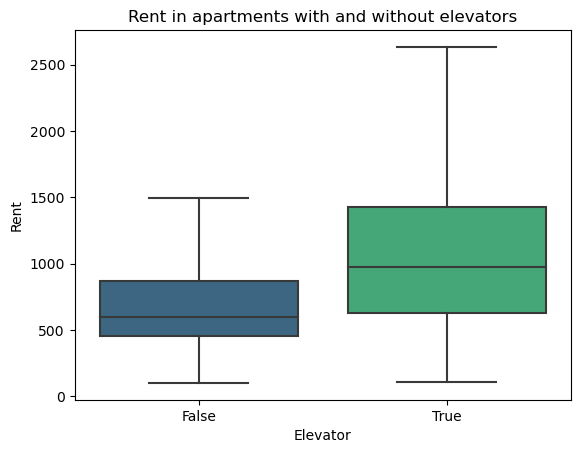

In [70]:
sns.boxplot(data=df, x='lift', y='totalRent', palette= 'viridis',
           sym='')
plt.title('Rent in apartments with and without elevators')
plt.xlabel('Elevator')
plt.ylabel('Rent')

# Q: How do refurbishment and apartment type relate to rental price?
### A: Penthouses, lofts, terraced flats and maisonettes are (unsurprisingly) more expensive and newer

In [39]:
df.groupby(['typeOfFlat']).agg({'typeOfFlat': ['count'],
                          'totalRent': ['mean', 'median'],
                          'price/unit':['mean', 'median'], 
                          'yearConstructed':['mean', 'median'],  
                          'livingSpace':['mean', 'median'],
                          'picturecount':['mean', 'median'],
                          'districtPopTrend':['mean', 'median']})

typeOfFlat    totalRent          price/unit             \
                         count         mean   median       mean     median   
typeOfFlat                                                                   
apartment               126548   808.541304   655.00  11.457173   9.909522   
ground_floor             30559   789.952271   660.00  11.140916  10.080645   
half_basement             1980   676.695278   600.00  11.862689  10.909091   
loft                       943  1453.841728  1250.00  13.270901  12.000000   
maisonette                8948  1301.376534  1150.00  11.917369  11.176471   
other                     8968   794.864183   650.00  11.465040   9.934658   
penthouse                 3546  1860.728241  1620.00  15.205137  14.227273   
raised_ground_floor       5380   770.470518   640.00  10.942852   9.891304   
roof_storey              33345   773.621325   635.00  10.502270   9.456522   
terraced_flat             3322  1174.283227  1061.14  13.515044  12.534776   

                    yearConstructed         livingSpace        picturecount  \
                               mean  median        mean median         mean   
typeOfFlat                                                                    
apartment               1967.303910  1972.0   71.845658   67.0     9.595189   
ground_floor            1968.720114  1973.0   71.805126   66.3     9.186066   
half_basement           1979.428286  1985.0   60.336177   56.0     8.758081   
loft                    1962.355039  1989.0  115.533871  106.0    13.253446   
maisonette              1971.797835  1993.0  109.953482  105.0    13.886679   
other                   1968.010996  1976.0   72.247853   66.0     9.006133   
penthouse               2004.632348  2016.0  124.358156  119.0    13.653976   
raised_ground_floor     1951.554854  1960.0   70.909214   65.0    10.672677   
roof_storey             1961.928799  1970.0   73.450037   68.5    10.382696   
terraced_flat           1991.398277  2000.0   89.319645   84.0    12.233293   

                           districtPopTrend         
                    median             mean median  
typeOfFlat                                          
apartment              9.0         0.481883  0.480  
ground_floor           8.0         0.452708  0.440  
half_basement          8.0         0.522919  0.540  
loft                  12.0         0.646363  0.570  
maisonette            13.0         0.558814  0.540  
other                  8.0         0.409832  0.490  
penthouse             13.0         0.669681  0.640  
raised_ground_floor   10.0         0.495240  0.475  
roof_storey            9.0         0.440583  0.410  
terraced_flat         11.0         0.609928  0.610

# 04. Description length analysis

### Q: Does description length correlate with price?
### A: Somewhat, but it's not a really strong correlation

In [40]:
df['description length'] = df['description'].str.len()

<Axes: xlabel='description length', ylabel='Count'>

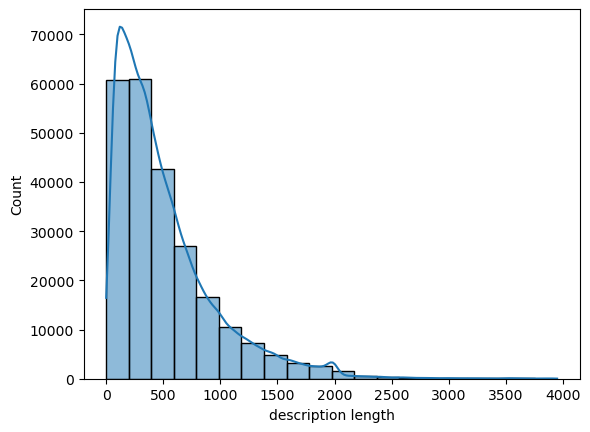

In [42]:
sns.histplot(df['description length'], bins=20, kde = True)

In [43]:
sub = df[['price/unit', 'totalRent', 'livingSpace', 'picturecount', 'yearConstructed', 'districtPopTrend', 'description length']]

In [44]:
sub.corr()

,price/unit,totalRent,livingSpace,picturecount,yearConstructed,districtPopTrend,description length
price/unit,1.000000,0.529842,-0.024684,0.151584,0.222880,0.367764,0.299532
totalRent,0.529842,1.000000,0.738440,0.293153,0.183669,0.321266,0.310869
livingSpace,-0.024684,0.738440,1.000000,0.275446,0.067468,0.130747,0.199617
picturecount,0.151584,0.293153,0.275446,1.000000,0.007379,0.132597,0.246324
yearConstructed,0.222880,0.183669,0.067468,0.007379,1.000000,0.100304,0.154026
districtPopTrend,0.367764,0.321266,0.130747,0.132597,0.100304,1.000000,0.149716
description length,0.299532,0.310869,0.199617,0.246324,0.154026,0.149716,1.000000


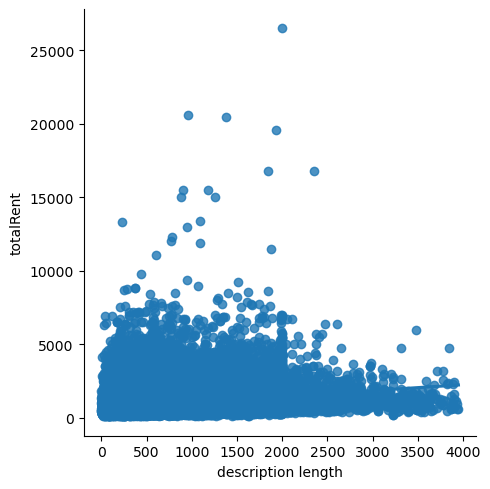

In [46]:
sns.lmplot(x = 'description length', y = 'totalRent', data = df)

# 05. Box and whiskers for totalRent, livingSpace, unit price

In [46]:
# drop blank values 
df_rent = df['totalRent']
df_rent_plt = df_rent.dropna(inplace=False)


Text(0.5, 1.0, 'Rent in Germany (outliers excluded)')

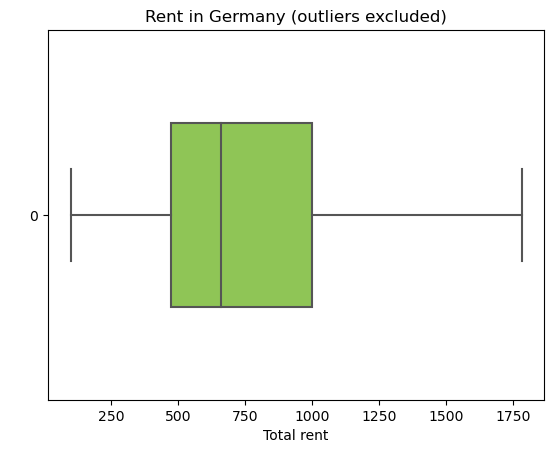

In [108]:
import statistics 
boxplot= sns.boxplot(data=df_rent_plt, width=0.5, orient='h', color= '#8fd744ff',
           sym='')
plt.xlabel('Total rent')
plt.ylabel(' ')
plt.title('Rent in Germany (outliers excluded)')

In [93]:
str(medians)

'660.0'

In [59]:
# drop blank values 
df_space = df['livingSpace']
df_space_plt = df_space.dropna(inplace=False)

Text(0.5, 1.0, 'Apartment size in Germany (outliers excluded)')

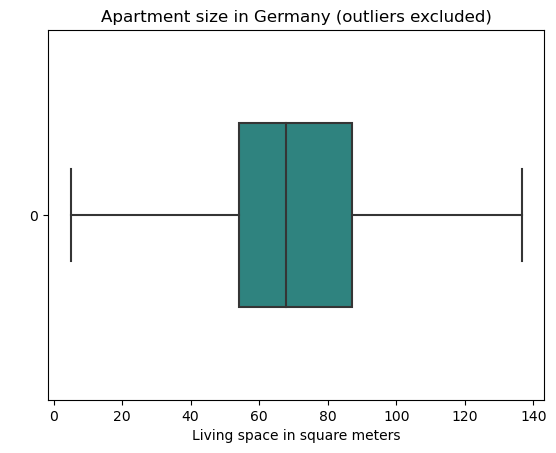

In [75]:
sns.boxplot(data=df_space_plt, width=0.5, orient='h', palette= 'viridis',
           sym='')
plt.xlabel('Living space in square meters')
plt.ylabel(' ')
plt.title('Apartment size in Germany (outliers excluded)')

In [61]:
# drop blank values 
df_up = df['price/unit']
df_up_plt = df_up.dropna(inplace=False)

Text(0.5, 1.0, 'Rent per square meter in Germany (outliers excluded)')

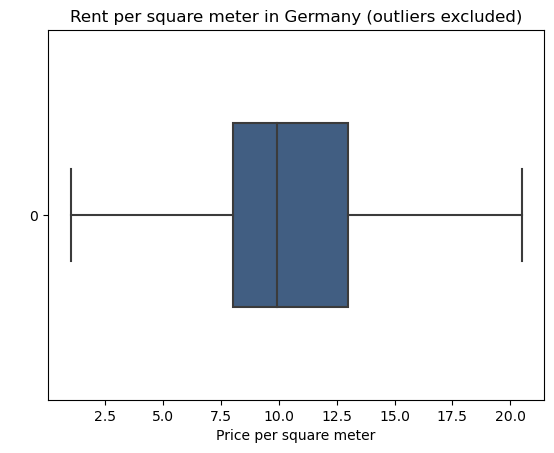

In [80]:
sns.boxplot(data=df_up_plt, width=0.5, orient='h', color='#365d8dff',
           sym='')
plt.xlabel('Price per square meter')
plt.ylabel(' ')
plt.title('Rent per square meter in Germany (outliers excluded)')